In [1]:
import utils
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# dealing with a typical bank csv

it looks like:

In [2]:
pd.read_csv("data/transactions.csv").head()

,17/10/2017,-12.00,"RETAIL PURCHASE ULTIMO MINIMARKET QPS, ULTIMO 1510 AUD000000001200"
0,17/10/2017,-29.81,"RETAIL PURCHASE COLES 08001, RANDWICK 1610 AUD..."
1,17/10/2017,-39.76,"RETAIL PURCHASE COLES 0839, BROADWAY 1510 AUD0..."
2,17/10/2017,-9.00,"RETAIL PURCHASE UBER *TRIP 67OVN, SYDNEY 1610 ..."
3,17/10/2017,-68.00,"RETAIL PURCHASE PUB LIFE KITCHEN, ULTIMO 1310 ..."
4,17/10/2017,-25.20,"RETAIL PURCHASE Telstra Accessories, MELBOURNE..."


And tranforms into:

In [3]:
df = utils.parse_csv("data/transactions.csv", "typical")
df.head()

parsed file with typical parser


,date,amount,description,category,merchant,suburb,deal_with_later
0,2017-10-17,-12.00,"RETAIL PURCHASE ULTIMO MINIMARKET QPS, ULTIMO ...",NaN,RETAIL PURCHASE ULTIMO MINIMARKET QPS,ULTIMO,AUD000000001200
1,2017-10-17,-29.81,"RETAIL PURCHASE COLES 08001, RANDWICK 1610 AUD...",NaN,RETAIL PURCHASE COLES 08001,RANDWICK,AUD000000002981
2,2017-10-17,-39.76,"RETAIL PURCHASE COLES 0839, BROADWAY 1510 AUD0...",NaN,RETAIL PURCHASE COLES 0839,BROADWAY,AUD000000003976
3,2017-10-17,-9.00,"RETAIL PURCHASE UBER *TRIP 67OVN, SYDNEY 1610 ...",NaN,RETAIL PURCHASE UBER *TRIP 67OVN,SYDNEY,AUD000000000900
4,2017-10-17,-68.00,"RETAIL PURCHASE PUB LIFE KITCHEN, ULTIMO 1310 ...",NaN,RETAIL PURCHASE PUB LIFE KITCHEN,ULTIMO,AUD000000006800


In [4]:
df.dtypes

date               datetime64[ns]
amount                    float64
description                object
category                  float64
merchant                   object
suburb                     object
deal_with_later            object
dtype: object

# dealing with a pocketbook exported csv

it originaly looks like:

In [5]:
pd.read_csv("data/pocketbook-export.csv").head()

,date,description,category,amount,notes,tags,bank,accountname,accountnumber
0,01/07/2014,Gusto Italian Restasuratthani Thb000000236000,Entertainment - Food,-79.40,NaN,NaN,BENDIGO_BANK,MasterCard Account,694645268
1,01/07/2014,Tpg Internet Pty Ltnorth Ryde Aud000000005999,Utilities - Phone/Internet,-59.99,NaN,NaN,BENDIGO_BANK,MasterCard Account,694645268
2,03/07/2014,Mtpmedia Temple I8775784000 Usd000000005000,Web Hosting,-54.03,NaN,NaN,BENDIGO_BANK,MasterCard Account,694645268
3,04/07/2014,Ebanking Transfer,Transferring Money,665.00,NaN,NaN,BENDIGO_BANK,MasterCard Account,694645268
4,04/07/2014,Digitalocean Usd000000001000,NaN,-10.82,NaN,NaN,BENDIGO_BANK,MasterCard Account,694645268


In [29]:
df = utils.parse_csv("data/pocketbook-export.csv", "pocketbook")
df.head()

parsed file with pocketbook parser


,date,description,amount,category,subcategory,merchant,suburb,deal_with_later
0,2014-01-07,Gusto Italian Restasuratthani Thb000000236000,-79.40,entertainment,Food,Gusto Italian,Restasuratthani,Thb000000236000
1,2014-01-07,Tpg Internet Pty Ltnorth Ryde Aud000000005999,-59.99,utilities,Phone/Internet,Tpg Internet Pty Ltnorth,Ryde,Aud000000005999
2,2014-03-07,Mtpmedia Temple I8775784000 Usd000000005000,-54.03,web hosting,None,Mtpmedia Temple,I8775784000,Usd000000005000
3,2014-04-07,Ebanking Transfer,665.00,transferring money,None,Ebanking Transfer,None,None
4,2014-04-07,Digitalocean Usd000000001000,-10.82,NaN,None,Digitalocean Usd000000001000,None,None


In [30]:
df.dtypes

date               datetime64[ns]
description                object
amount                    float64
category                   object
subcategory                object
merchant                   object
suburb                     object
deal_with_later            object
dtype: object

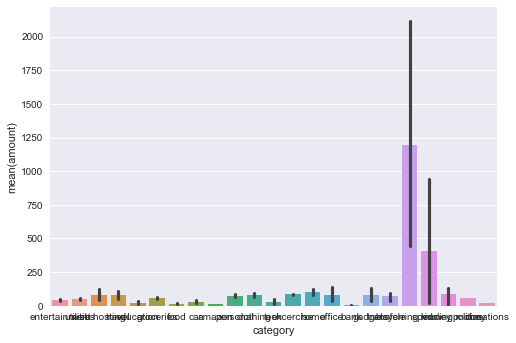

In [40]:
#df = df[df.amount<=0]
#df.amount = df['amount'].apply(abs)
sns.barplot(x="category", y="amount",data=df)

In [43]:
mask = df[df.category != "transferring money"]
df[mask]

ValueError: Must pass DataFrame with boolean values only

In [44]:
df


,date,description,amount,category,subcategory,merchant,suburb,deal_with_later
0,2014-01-07,Gusto Italian Restasuratthani Thb000000236000,79.40,entertainment,Food,Gusto Italian,Restasuratthani,Thb000000236000
1,2014-01-07,Tpg Internet Pty Ltnorth Ryde Aud000000005999,59.99,utilities,Phone/Internet,Tpg Internet Pty Ltnorth,Ryde,Aud000000005999
2,2014-03-07,Mtpmedia Temple I8775784000 Usd000000005000,54.03,web hosting,None,Mtpmedia Temple,I8775784000,Usd000000005000
4,2014-04-07,Digitalocean Usd000000001000,10.82,NaN,None,Digitalocean Usd000000001000,None,None
5,2014-04-07,Whittard Of Chelse1suratthani Thb000000029000,9.76,travel,Overseas,Whittard Of,Chelse1suratthani,Thb000000029000
6,2014-04-07,Eraman Duty Free Klia Sepang Myr000000041500,140.26,travel,Overseas,Eraman Duty Free Klia,Sepang,Myr000000041500
7,2014-04-07,Asikickstarter C8667497545 Usd000000002500,27.05,education,Books,Asikickstarter,C8667497545,Usd000000002500
8,2014-05-07,Hfm Broadway Broadway Aud000000001398,13.98,groceries,None,Hfm Broadway,Broadway,Aud000000001398
9,2014-05-07,Starbucksklia Sepang Myr000000001700,5.81,NaN,None,Starbucksklia,Sepang,Myr000000001700
10,2014-05-07,Starbucksklia Sepang Myr000000006150,21.03,food,Lunches,Starbucksklia,Sepang,Myr000000006150
